In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import h5py
import scipy.io
from scipy.stats import zscore
import matplotlib.pyplot as plt
from itertools import product

# Load the MATLAB results
file_path = '/home/dwk681/workspace/GSE141252_Stoeger_et_al._2022/tensor_data/zscored_tensor_rank20_300iterations.mat'
data = scipy.io.loadmat(file_path)

# Extract the sol_factors
sol_factors = data['sol_factors']

# Analyze the results
# Example: Print the shapes of the factors
for i in range(sol_factors.shape[1]):
    u, v, p = sol_factors[0, i][0]
    print(f"Rank {i+1}: U shape = {u.shape}, V shape = {v.shape}, P shape = {p.shape}")

Rank 1: U shape = (4, 1), V shape = (43430, 1), P shape = (17, 1)
Rank 2: U shape = (4, 2), V shape = (43430, 2), P shape = (17, 2)
Rank 3: U shape = (4, 3), V shape = (43430, 3), P shape = (17, 3)
Rank 4: U shape = (4, 4), V shape = (43430, 4), P shape = (17, 4)
Rank 5: U shape = (4, 5), V shape = (43430, 5), P shape = (17, 5)
Rank 6: U shape = (4, 6), V shape = (43430, 6), P shape = (17, 6)
Rank 7: U shape = (4, 7), V shape = (43430, 7), P shape = (17, 7)
Rank 8: U shape = (4, 8), V shape = (43430, 8), P shape = (17, 8)
Rank 9: U shape = (4, 9), V shape = (43430, 9), P shape = (17, 9)
Rank 10: U shape = (4, 10), V shape = (43430, 10), P shape = (17, 10)
Rank 11: U shape = (4, 11), V shape = (43430, 11), P shape = (17, 11)
Rank 12: U shape = (4, 12), V shape = (43430, 12), P shape = (17, 12)
Rank 13: U shape = (4, 13), V shape = (43430, 13), P shape = (17, 13)
Rank 14: U shape = (4, 14), V shape = (43430, 14), P shape = (17, 14)
Rank 15: U shape = (4, 15), V shape = (43430, 15), P sha

In [39]:
sol_factors[0, 10][0][0]

array([[0.08013715, 0.1389815 , 0.08591796, 0.07490039, 0.31537404,
        0.34278979, 0.08645948, 0.20025794, 0.34278112, 0.09817081,
        0.15494217],
       [0.08172663, 0.14270312, 0.08795592, 0.07732248, 0.32468095,
        0.34912063, 0.08964044, 0.20245426, 0.35166534, 0.09927732,
        0.1590345 ],
       [0.07903527, 0.13939807, 0.08613483, 0.07552299, 0.31623992,
        0.34104999, 0.08595314, 0.19903494, 0.34345027, 0.09791216,
        0.1543463 ],
       [0.07792102, 0.14008807, 0.08542833, 0.07655467, 0.31594208,
        0.34095352, 0.08509454, 0.20053082, 0.3401352 , 0.0967839 ,
        0.15724239]])

In [45]:
sol_factors[0, 2][0][0]

array([[1.0100109 , 0.81878925, 0.36328898],
       [0.91331164, 0.85247474, 0.43104358],
       [0.92943451, 0.70136931, 0.4685956 ],
       [0.95104344, 0.38588544, 0.62368297]])

In [46]:
sol_factors[0, 2][0][2]

array([[0.66436398, 0.64399825, 1.14624548],
       [0.65801901, 0.63214344, 1.18814076],
       [0.66042936, 0.66768033, 1.12167964],
       [0.6688367 , 0.62354783, 1.15009611],
       [0.6686416 , 0.60099297, 1.18200368],
       [0.6680634 , 0.65775649, 1.11238689],
       [0.66512061, 0.7105355 , 1.04868481],
       [0.67336364, 0.55355726, 1.23312708],
       [0.65753961, 0.64990369, 1.17004298],
       [0.66047058, 0.64361804, 1.16591653],
       [0.66620006, 0.62839309, 1.16408526],
       [0.66501492, 0.60379139, 1.19788044],
       [0.66439435, 0.57327995, 1.23723459],
       [0.65812986, 0.65932126, 1.15166109],
       [0.66223405, 0.62243624, 1.18476564],
       [0.65797519, 0.62499733, 1.19247934],
       [0.6631582 , 0.60005013, 1.2072939 ]])

In [48]:
sol_factors[0, 1][0][0]

array([[0.73251699, 1.40222871],
       [0.80650383, 1.32852152],
       [0.92181589, 1.04595144],
       [1.26822792, 0.40099253]])

In [47]:
sol_factors[0, 1][0][2]

array([[0.91971364, 0.54632393],
       [0.95453676, 0.51852567],
       [0.88438541, 0.57910609],
       [0.93369066, 0.52548379],
       [0.97008665, 0.49145249],
       [0.88259298, 0.57793672],
       [0.80101687, 0.65570168],
       [1.03386877, 0.42986414],
       [0.92253129, 0.55140343],
       [0.92368926, 0.54723647],
       [0.93305067, 0.53360253],
       [0.97432049, 0.49348624],
       [1.02784136, 0.44085865],
       [0.90478934, 0.5658019 ],
       [0.95235488, 0.51718231],
       [0.97000754, 0.50132946],
       [0.98661522, 0.48151496]])

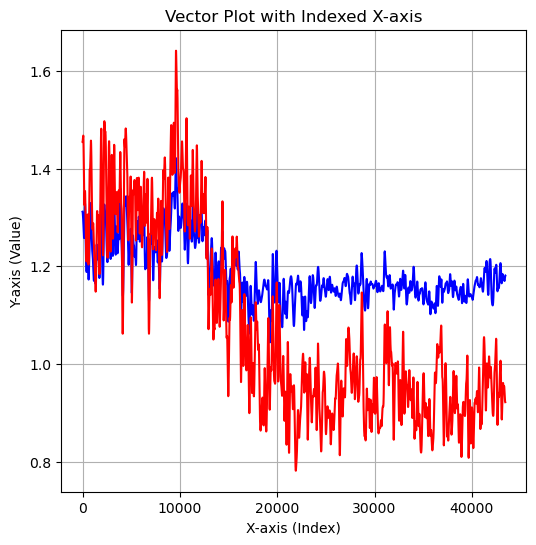

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


# Vector remains the same
vector = sol_factors[0, 1][0][1][:,1]
vector_rank3 = sol_factors[0, 2][0][1][:, 1]

# Length of the vector for X-axis
vector_length = len(vector)

# Generating X-axis values
x_values = list(range(vector_length))

# Smoothing the vector
#smoothed_vector = gaussian_filter1d(vector, sigma=50)
#smoothed_vector_rank3 = gaussian_filter1d(vector_rank3, sigma=50)
# Find the maximum value in both original and smoothed vectors for setting y-axis limits
max_value = max(vector.max(), smoothed_vector.max())

# Plotting the original and smoothed vectors
plt.figure(figsize=(6,6))
plt.plot(x_values, smoothed_vector, color='b', label='Smoothed')
plt.plot(x_values, smoothed_vector_rank3, color='r', label='Smoothed')
plt.xlabel('X-axis (Index)')
plt.ylabel('Y-axis (Value)')
plt.title('Vector Plot with Indexed X-axis')
plt.grid(True)
plt.show()

In [68]:
x_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
